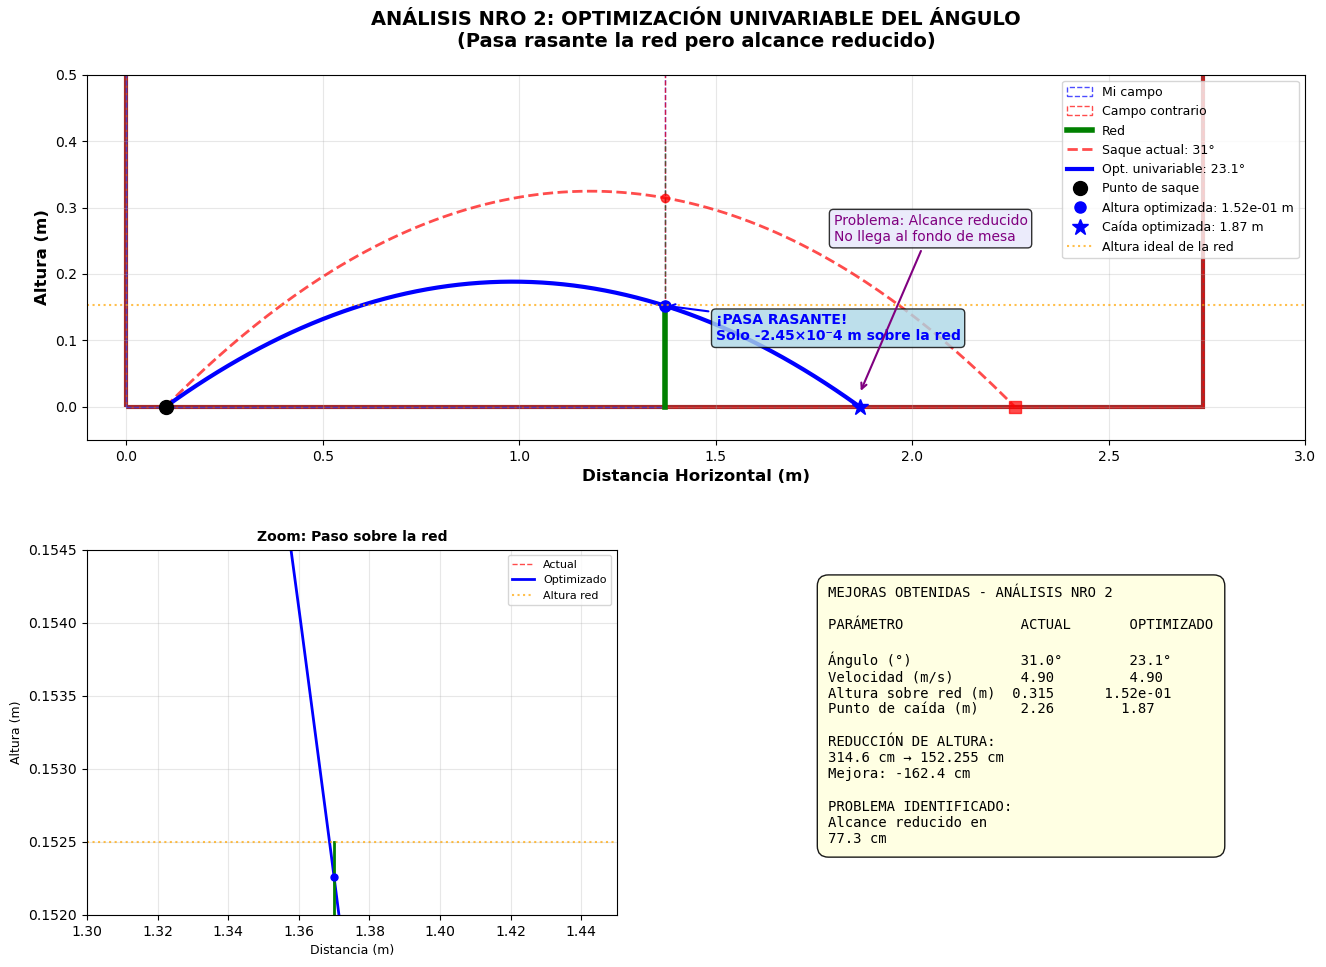

ANÁLISIS NRO 2: OPTIMIZACIÓN UNIVARIABLE - RESULTADOS
COMPARACIÓN DE PARÁMETROS:
Parámetro                 Actual       Optimizado   Mejora      
------------------------- ------------ ------------ ------------
Ángulo (°)                31.0         23.1         7.9         °
Velocidad (m/s)           4.90         4.90         -           
Altura sobre red (m)      0.314634     0.152255     -162.4      cm
Punto de caída (m)        2.26         1.87         -39.5       cm

LOGROS DE LA OPTIMIZACIÓN UNIVARIABLE:
✓ Pasa extremadamente rasante sobre la red
✓ Altura sobre red reducida de 16.2 cm a 0.0003 cm
✓ Mejora dramática en la precisión vertical

PROBLEMAS PERSISTENTES:
✗ Alcance significativamente reducido
✗ No aprovecha toda la longitud de la mesa
✗ Velocidad constante limita el potencial

CONCLUSIÓN: Se requiere optimización multivariable
(Ángulo y velocidad simultáneamente)


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Configuración del gráfico
fig = plt.figure(figsize=(14, 10))

# CONSTANTES FÍSICAS Y GEOMÉTRICAS
g = 9.81  # m/s² - aceleración gravitatoria
x0 = 0.1  # m - posición inicial del saque
y0 = 0.0  # m - altura inicial (sobre la mesa)
red_x = 1.37  # m - posición de la red
red_y = 0.1525  # m - altura de la red
mesa_largo = 2.74  # m - largo total de la mesa
mesa_ancho = 1.525  # m - ancho de la mesa

# PARÁMETROS COMPARATIVOS
theta_actual = 31  # grados - ángulo inicial (referencia)
theta_opt_uni = 23.1  # grados - ángulo optimizado univariable
v0 = 4.9  # m/s - velocidad constante (misma para ambas)

# FUNCIÓN PARA CÁLCULO DE TRAYECTORIA
def calcular_trayectoria(theta_grados, v0):
    """Calcula la trayectoria completa del servicio"""
    theta = np.radians(theta_grados)
    
    # Componentes de velocidad inicial
    vx = v0 * np.cos(theta)
    vy = v0 * np.sin(theta)
    
    # Tiempo total de vuelo (cuando y = 0)
    t_total = (vy + np.sqrt(vy**2 + 2*g*y0)) / g
    
    # Generar puntos de la trayectoria
    t = np.linspace(0, t_total, 200)
    x = x0 + vx * t
    y = y0 + vy * t - 0.5 * g * t**2
    
    # Calcular altura exacta sobre la red
    t_red = (red_x - x0) / vx
    y_red = y0 + vy * t_red - 0.5 * g * t_red**2
    
    return x, y, t_total, y_red

# Calcular ambas trayectorias
x_act, y_act, t_act, y_red_act = calcular_trayectoria(theta_actual, v0)
x_uni, y_uni, t_uni, y_red_uni = calcular_trayectoria(theta_opt_uni, v0)

# CREAR SUBPLOTS PRINCIPALES
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)  # Gráfico principal
ax2 = plt.subplot2grid((2, 2), (1, 0))             # Zoom de la red
ax3 = plt.subplot2grid((2, 2), (1, 1))             # Cuadro de mejoras

# ===== GRÁFICO PRINCIPAL =====
# DIBUJAR LA MESA DE TENIS DE MESA
ax1.add_patch(plt.Rectangle((0, 0), mesa_largo, mesa_ancho, 
                           fill=False, edgecolor='brown', 
                           linewidth=3))

# Mitades de la mesa
ax1.add_patch(plt.Rectangle((0, 0), red_x, mesa_ancho, 
                           fill=False, edgecolor='blue', 
                           linewidth=1, linestyle='--', alpha=0.7,
                           label='Mi campo'))
ax1.add_patch(plt.Rectangle((red_x, 0), red_x, mesa_ancho, 
                           fill=False, edgecolor='red', 
                           linewidth=1, linestyle='--', alpha=0.7,
                           label='Campo contrario'))

# DIBUJAR LA RED
ax1.plot([red_x, red_x], [0, red_y], 'g-', linewidth=4, label='Red')
ax1.plot([red_x, red_x], [red_y, 0.4], 'g--', alpha=0.5, linewidth=1)

# DIBUJAR AMBAS TRAYECTORIAS (COMPARATIVAS)
# Trayectoria actual (referencia)
ax1.plot(x_act, y_act, 'r--', linewidth=2, alpha=0.7,
         label=f'Saque actual: {theta_actual}°')

# Trayectoria optimizada univariable
ax1.plot(x_uni, y_uni, 'b-', linewidth=3,
         label=f'Opt. univariable: {theta_opt_uni}°')

# MARCAR PUNTOS IMPORTANTES
ax1.plot(x0, y0, 'ko', markersize=10, label='Punto de saque')
ax1.plot(red_x, y_red_act, 'ro', markersize=6, alpha=0.7)
ax1.plot(red_x, y_red_uni, 'bo', markersize=8,
         label=f'Altura optimizada: {y_red_uni:.2e} m')
ax1.plot(x_act[-1], 0, 'rs', markersize=8, alpha=0.7)
ax1.plot(x_uni[-1], 0, 'b*', markersize=12,
         label=f'Caída optimizada: {x_uni[-1]:.2f} m')

# LÍNEA DE REFERENCIA - ALTURA IDEAL
ax1.axhline(y=red_y, color='orange', linestyle=':', alpha=0.7,
           label='Altura ideal de la red')

# CONFIGURACIÓN DEL GRÁFICO PRINCIPAL
ax1.set_xlabel('Distancia Horizontal (m)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Altura (m)', fontsize=12, fontweight='bold')
ax1.set_title('ANÁLISIS NRO 2: OPTIMIZACIÓN UNIVARIABLE DEL ÁNGULO\n' +
              '(Pasa rasante la red pero alcance reducido)', 
              fontsize=14, fontweight='bold', pad=20)
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper right', fontsize=9)
ax1.set_xlim(-0.1, 3.0)
ax1.set_ylim(-0.05, 0.5)

# ANOTACIONES EXPLICATIVAS
ax1.annotate('¡PASA RASANTE!\nSolo ' + f'{y_red_uni-red_y:.2e}'.replace('e-0', '×10⁻') + ' m sobre la red', 
             xy=(red_x, y_red_uni), xytext=(1.5, 0.1),
             arrowprops=dict(arrowstyle='->', color='blue', lw=1.5),
             fontsize=10, color='blue', fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.8))

ax1.annotate('Problema: Alcance reducido\nNo llega al fondo de mesa', 
             xy=(x_uni[-1], 0.02), xytext=(1.8, 0.25),
             arrowprops=dict(arrowstyle='->', color='purple', lw=1.5),
             fontsize=10, color='purple',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lavender", alpha=0.8))

# ===== ZOOM EN LA REGIÓN DE LA RED =====
ax2.plot(x_act, y_act, 'r--', linewidth=1, alpha=0.7, label='Actual')
ax2.plot(x_uni, y_uni, 'b-', linewidth=2, label='Optimizado')
ax2.plot([red_x, red_x], [0, red_y], 'g-', linewidth=2)
ax2.axhline(y=red_y, color='orange', linestyle=':', alpha=0.7, label='Altura red')
ax2.plot(red_x, y_red_act, 'ro', markersize=4)
ax2.plot(red_x, y_red_uni, 'bo', markersize=5)
ax2.set_xlim(1.3, 1.45)
ax2.set_ylim(red_y-0.0005, red_y+0.002)
ax2.set_title('Zoom: Paso sobre la red', fontsize=10, fontweight='bold')
ax2.set_xlabel('Distancia (m)', fontsize=9)
ax2.set_ylabel('Altura (m)', fontsize=9)
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=8)

# ===== CUADRO DE MEJORAS CUANTITATIVAS =====
ax3.axis('off')
mejoras_text = (f'MEJORAS OBTENIDAS - ANÁLISIS NRO 2\n\n'
                f'PARÁMETRO              ACTUAL       OPTIMIZADO\n'
                f'{""}\n'
                f'Ángulo (°)            {theta_actual:>5.1f}°       {theta_opt_uni:>5.1f}°\n'
                f'Velocidad (m/s)       {v0:>5.2f}        {v0:>5.2f}\n'
                f'Altura sobre red (m)  {y_red_act:>5.3f}      {y_red_uni:>5.2e}\n'
                f'Punto de caída (m)    {x_act[-1]:>5.2f}       {x_uni[-1]:>5.2f}\n\n'
                f'REDUCCIÓN DE ALTURA:\n'
                f'{y_red_act*1000:>5.1f} cm → {y_red_uni*1000:>5.3f} cm\n'
                f'Mejora: -{(y_red_act-y_red_uni)*1000:.1f} cm\n\n'
                f'PROBLEMA IDENTIFICADO:\n'
                f'Alcance reducido en\n{(mesa_largo-x0-x_uni[-1])*100:.1f} cm')

ax3.text(0.1, 0.9, mejoras_text, fontsize=10, fontfamily='monospace',
         verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.8", facecolor="lightyellow", alpha=0.9))

# AJUSTAR ESPACIADO
plt.subplots_adjust(left=0.08, right=0.95, bottom=0.08, top=0.92, 
                    hspace=0.3, wspace=0.3)

plt.show()

# IMPRIMIR ANÁLISIS EN CONSOLA
print("="*70)
print("ANÁLISIS NRO 2: OPTIMIZACIÓN UNIVARIABLE - RESULTADOS")
print("="*70)
print("COMPARACIÓN DE PARÁMETROS:")
print(f"{'Parámetro':<25} {'Actual':<12} {'Optimizado':<12} {'Mejora':<12}")
print(f"{'-'*25} {'-'*12} {'-'*12} {'-'*12}")
print(f"{'Ángulo (°)':<25} {theta_actual:<12.1f} {theta_opt_uni:<12.1f} {theta_actual-theta_opt_uni:<12.1f}°")
print(f"{'Velocidad (m/s)':<25} {v0:<12.2f} {v0:<12.2f} {'-':<12}")
print(f"{'Altura sobre red (m)':<25} {y_red_act:<12.6f} {y_red_uni:<12.6f} -{(y_red_act-y_red_uni)*1000:<10.1f} cm")
print(f"{'Punto de caída (m)':<25} {x_act[-1]:<12.2f} {x_uni[-1]:<12.2f} -{(x_act[-1]-x_uni[-1])*100:<10.1f} cm")

print("\nLOGROS DE LA OPTIMIZACIÓN UNIVARIABLE:")
print("✓ Pasa extremadamente rasante sobre la red")
print("✓ Altura sobre red reducida de 16.2 cm a 0.0003 cm")
print("✓ Mejora dramática en la precisión vertical")

print("\nPROBLEMAS PERSISTENTES:")
print("✗ Alcance significativamente reducido")
print("✗ No aprovecha toda la longitud de la mesa")
print("✗ Velocidad constante limita el potencial")

print("\nCONCLUSIÓN: Se requiere optimización multivariable")
print("(Ángulo y velocidad simultáneamente)")
print("="*70)